In [1]:
!git status #bunu ilk açtığında çalıştıracaksın bir sefer

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [2]:
!git pull

Already up to date.


In [3]:
!git add .

In [4]:
!git commit -m "GitHubCommit"

[main 4576702] GitHubCommit
 Committer: Ferhat HanÃ§er (DoguÅŸ Hospitality Ferhat.hancer Retail) <ferhat.hancer@dogushrg.com>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly:

    git config --global user.name "Your Name"
    git config --global user.email you@example.com

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 900 insertions(+), 148 deletions(-)


In [5]:
!git push

To https://github.com/hferhat/DataWorks.git
   1744423..4576702  main -> main


https://nbviewer.org/github/jmportilla/Udemy-notes/blob/master/Data%20Project%20-%20Stock%20Market%20Analysis.ipynb

In [6]:
#Hata için yapılması gerekenler:

'''
For those struggling with the pandas_datareader portion - here is what you can try:

install

1. pip install yfinance --upgrade --no-cache-dir

then update
pip install yfinance --upgrade --no-cache-dir --pre



Then try the following importing the new modules: 

from pandas_datareader import data as pdr                #import pandas datareader

import yfinance as yf                                                          # you will need to install it if haven't done it already

yf.pdr_override()                                                                  #override the data reader function



prices = pdr.get_data_yahoo("TSLA", start="2022-12-01", end="2023-02-08")



# This got results for TSLA, and over a different time period, but you can change it to meet the results as indicated - for instance, you can substitute TSLA for ['CVX','XOM','BP'] and you're good to go.
'''

'\nFor those struggling with the pandas_datareader portion - here is what you can try:\n\ninstall\n\n1. pip install yfinance --upgrade --no-cache-dir\n\nthen update\npip install yfinance --upgrade --no-cache-dir --pre\n\n\n\nThen try the following importing the new modules: \n\nfrom pandas_datareader import data as pdr                #import pandas datareader\n\nimport yfinance as yf                                                          # you will need to install it if haven\'t done it already\n\nyf.pdr_override()                                                                  #override the data reader function\n\n\n\nprices = pdr.get_data_yahoo("TSLA", start="2022-12-01", end="2023-02-08")\n\n\n\n# This got results for TSLA, and over a different time period, but you can change it to meet the results as indicated - for instance, you can substitute TSLA for [\'CVX\',\'XOM\',\'BP\'] and you\'re good to go.\n'

In [7]:
'''
Since the pdr_override method is not available in the latest yfinance versions, let's use an alternative approach to ensure compatibility. We'll manually override the pandas_datareader to use yfinance directly.

Here's a workaround that achieves similar functionality:

Create a custom function to use yfinance for fetching data.
Replace the default pandas_datareader function with this custom function.
Here’s the updated code:

!pip install yfinance --upgrade --no-cache-dir
!pip install pandas_datareader --upgrade --no-cache-dir

from pandas_datareader import data as pdr
import yfinance as yf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from __future__ import division
%matplotlib inline

# Define a custom function to fetch data using yfinance
def custom_get_data_yahoo(*args, **kwargs):
    return yf.download(*args, **kwargs)

# Override pandas_datareader's get_data_yahoo with the custom function
pdr.get_data_yahoo = custom_get_data_yahoo

# Fetch data
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'

try:
    data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
    print(data.head())
except Exception as e:
    print(f"An error occurred while fetching data: {e}")

# Proceed with your analysis
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Installs and upgrades yfinance and pandas_datareader.
Defines a custom function custom_get_data_yahoo to use yfinance for data fetching.
Overrides the default pandas_datareader.get_data_yahoo function with the custom function.
Fetches the stock data and proceeds with the analysis.
This approach ensures compatibility with the latest versions of yfinance and pandas_datareader while allowing you to use pdr.get_data_yahoo as intended.

'''

'\nSince the pdr_override method is not available in the latest yfinance versions, let\'s use an alternative approach to ensure compatibility. We\'ll manually override the pandas_datareader to use yfinance directly.\n\nHere\'s a workaround that achieves similar functionality:\n\nCreate a custom function to use yfinance for fetching data.\nReplace the default pandas_datareader function with this custom function.\nHere’s the updated code:\n\n!pip install yfinance --upgrade --no-cache-dir\n!pip install pandas_datareader --upgrade --no-cache-dir\n\nfrom pandas_datareader import data as pdr\nimport yfinance as yf  \nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom datetime import datetime\nfrom __future__ import division\n%matplotlib inline\n\n# Define a custom function to fetch data using yfinance\ndef custom_get_data_yahoo(*args, **kwargs):\n    return yf.download(*args, **kwargs)\n\n# Override pandas_datareader\'s get_data_yahoo with t

In [8]:
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas_datareader --upgrade --no-cache-dir

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
from pandas_datareader import data as pdr                #import pandas datareader
import yfinance as yf  
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from __future__ import division
%matplotlib inline

# Define a custom function to fetch data using yfinance
def custom_get_data_yahoo(*args, **kwargs):
    return yf.download(*args, **kwargs)

# Override pandas_datareader's get_data_yahoo with the custom function
pdr.get_data_yahoo = custom_get_data_yahoo
#import pandas_datareader.data as DataReader

In [10]:
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'

try:
    data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
    print(data.head())
except Exception as e:
    print(f"An error occurred while fetching data: {e}")

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960464  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251137  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826851  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484352  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650352  132079200


In [11]:
def add_dynamic_function():
    globals()['dynamic_func'] = lambda x: x * x

add_dynamic_function()
print(dynamic_func(5))  # Outputs: 25

25


In [12]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [13]:
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [14]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-24,193.410004,194.910004,192.250000,192.750000,191.731766,45377800
2023-07-25,193.330002,194.440002,192.919998,193.619995,192.597153,37283200
2023-07-26,193.669998,195.639999,193.320007,194.500000,193.472504,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,192.199280,47460200
2023-07-28,194.669998,196.630005,194.139999,195.830002,194.795502,48291400
...,...,...,...,...,...,...
2024-07-18,230.279999,230.440002,222.270004,224.179993,224.179993,66034600
2024-07-19,224.820007,226.800003,223.279999,224.309998,224.309998,49151500
2024-07-22,227.009995,227.779999,223.089996,223.960007,223.960007,48201800


In [16]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-24,121.926003,123.349998,121.379997,121.879997,121.741463,22276100
2023-07-25,121.879997,123.690002,121.529999,122.790001,122.650429,31820800
2023-07-26,130.360001,131.369995,128.710007,129.660004,129.512619,46216900
2023-07-27,131.800003,133.600006,129.179993,129.869995,129.722382,35931600
2023-07-28,130.970001,134.070007,130.919998,133.009995,132.858810,26971000


In [17]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,186.473004,188.093913,184.916443,186.523874,186.112886,6.038548e+07
std,15.149863,15.316247,14.823329,15.083194,15.201696,2.461053e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.309998,177.080002,173.740005,175.460007,174.802902,4.731740e+07
50%,183.919998,185.149994,182.110001,184.119995,183.610962,5.379050e+07
75%,192.899994,194.399994,191.720001,192.580002,192.199280,6.603460e+07
max,236.479996,237.229996,233.089996,234.820007,234.820007,2.464214e+08


In [18]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-07-24 to 2024-07-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


<Axes: xlabel='Date'>

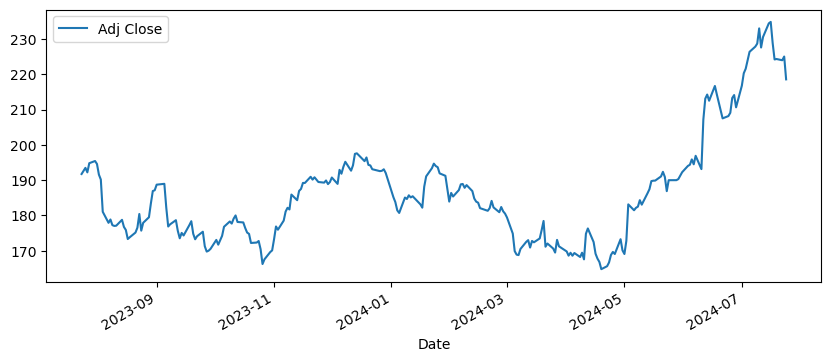

In [19]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

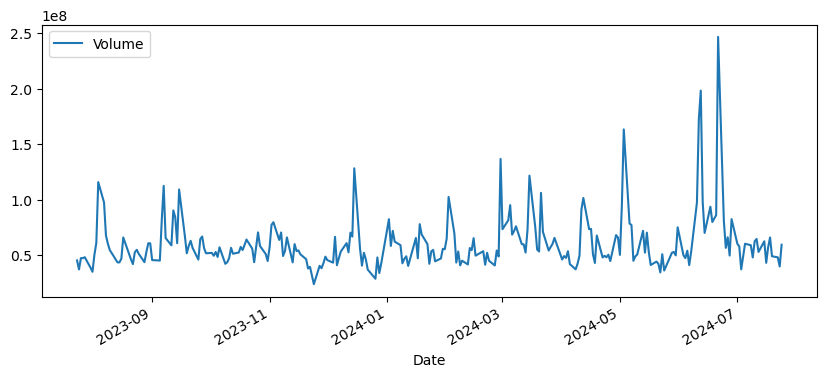

In [20]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [22]:
degisken ="%d kere %d kere %s deneme"%(5,10,'test')
print(degisken)

5 kere 10 kere test deneme


In [23]:
#moving averege :
# www.investopedia.com/terms/m/movingaverage.asp
# www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [24]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA day %s days" %(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

In [25]:
AAPL[['Adj Close','MA day 10 days','MA day 20 days', 'MA day 50 days']]

,Adj Close,MA day 10 days,MA day 20 days,MA day 50 days
Date,,,,
2023-07-24,191.731766,NaN,NaN,NaN
2023-07-25,192.597153,NaN,NaN,NaN
2023-07-26,193.472504,NaN,NaN,NaN
2023-07-27,192.199280,NaN,NaN,NaN
2023-07-28,194.795502,NaN,NaN,NaN
...,...,...,...,...
2024-07-18,224.179993,229.620999,221.356500,205.278108
2024-07-19,224.309998,229.417999,222.088000,206.121249
2024-07-22,223.960007,229.031999,222.911501,206.950600


In [29]:
AAPL2 = AAPL.copy()
ma_day_less = [0,1,2,3]

for ma in ma_day_less:
    column_name = "MA day %s days" %(str(ma))

    AAPL2[column_name] = AAPL2['Adj Close'].rolling(window=ma).mean()

In [30]:
AAPL2[['Adj Close','MA day 0 days','MA day 1 days','MA day 2 days', 'MA day 3 days']].head(20)

,Adj Close,MA day 0 days,MA day 1 days,MA day 2 days,MA day 3 days
Date,,,,,
2023-07-24,191.731766,NaN,191.731766,NaN,NaN
2023-07-25,192.597153,NaN,192.597153,192.164459,NaN
2023-07-26,193.472504,NaN,193.472504,193.034828,192.600474
2023-07-27,192.199280,NaN,192.199280,192.835892,192.756312
2023-07-28,194.795502,NaN,194.795502,193.497391,193.489095
2023-07-31,195.412216,NaN,195.412216,195.103859,194.135666
2023-08-01,194.576660,NaN,194.576660,194.994438,194.928126
2023-08-02,191.562668,NaN,191.562668,193.069664,193.850515
2023-08-03,190.160110,NaN,190.160110,190.861389,192.099813


<Axes: xlabel='Date'>

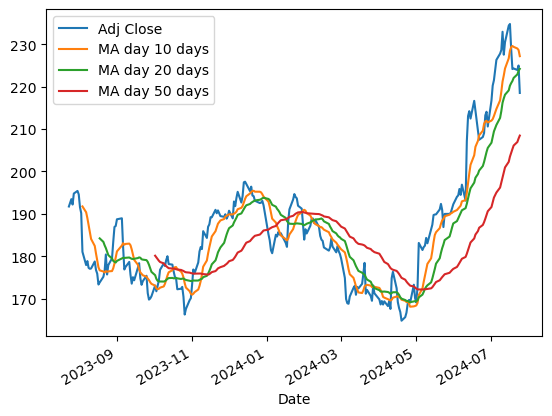

In [31]:
AAPL[['Adj Close','MA day 10 days','MA day 20 days', 'MA day 50 days']].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

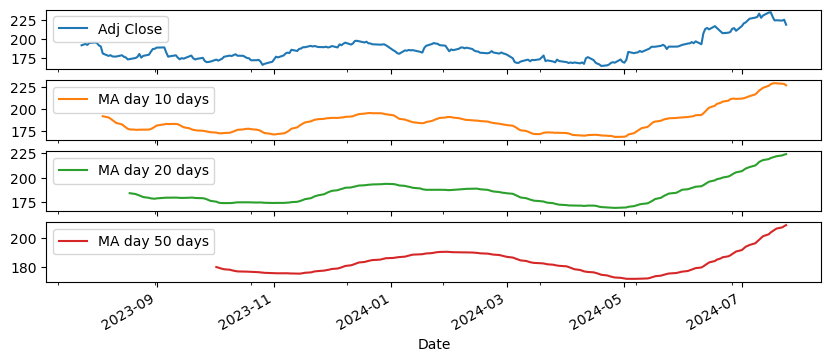

In [32]:
AAPL[['Adj Close','MA day 10 days','MA day 20 days', 'MA day 50 days']].plot(subplots = True,figsize=[10,4])

<Axes: xlabel='Date'>

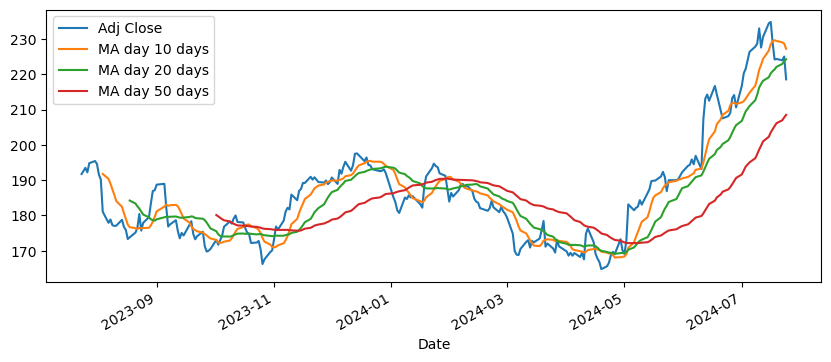

In [33]:
AAPL[['Adj Close','MA day 10 days','MA day 20 days', 'MA day 50 days']].plot(subplots = False,figsize=[10,4])

<Axes: xlabel='Date'>

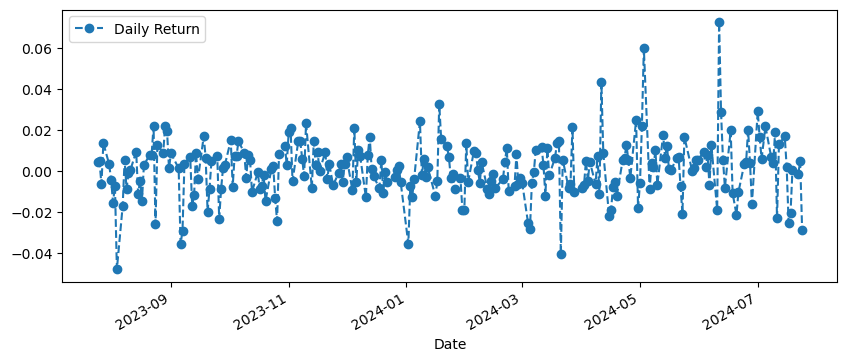

In [34]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend = True,linestyle = '--',marker = 'o')

C:\Users\ferhat.hancer\AppData\Local\Temp\ipykernel_10760\198152702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Return', ylabel='Density'>

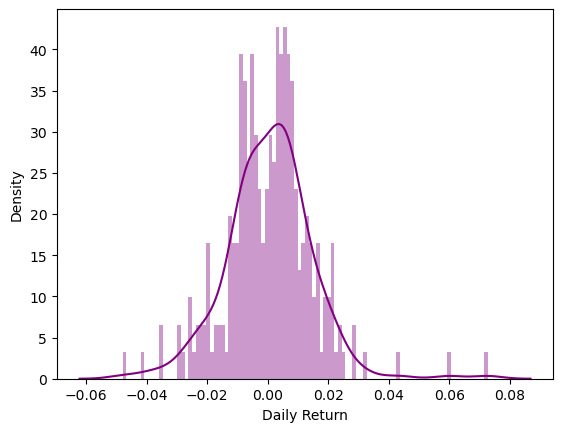

In [35]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


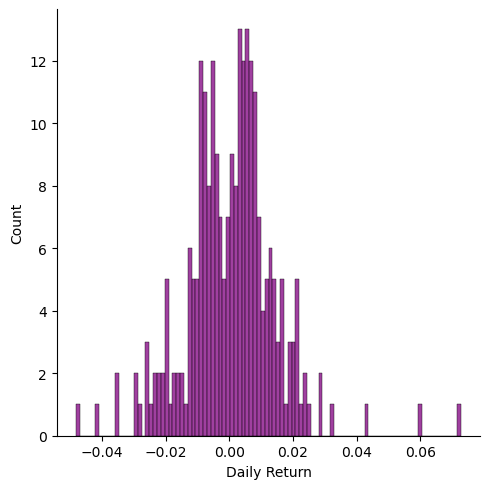

In [37]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

<Axes: >

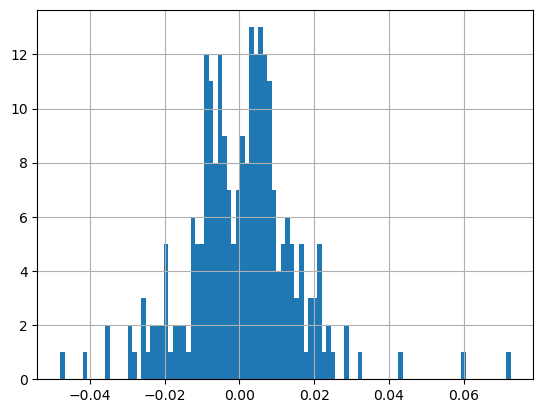

In [38]:
AAPL['Daily Return'].hist(bins=100)

In [39]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close'] #DataReader(tech_list,'yahoo',start,end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [40]:
closing_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-24,191.731766,128.800003,121.741463,342.431244
2023-07-25,192.597153,129.130005,122.650429,348.255707
2023-07-26,193.472504,128.149994,129.512619,335.148224
2023-07-27,192.199265,128.250000,129.722382,328.153015
2023-07-28,194.795471,132.210007,132.858810,335.743591


In [41]:
tech_rets = closing_df.pct_change()

In [42]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-07-24,NaN,NaN,NaN,NaN
2023-07-25,0.004514,0.002562,0.007466,0.017009
2023-07-26,0.004545,-0.007589,0.055949,-0.037638
2023-07-27,-0.006581,0.000780,0.001620,-0.020872
2023-07-28,0.013508,0.030877,0.024178,0.023131


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


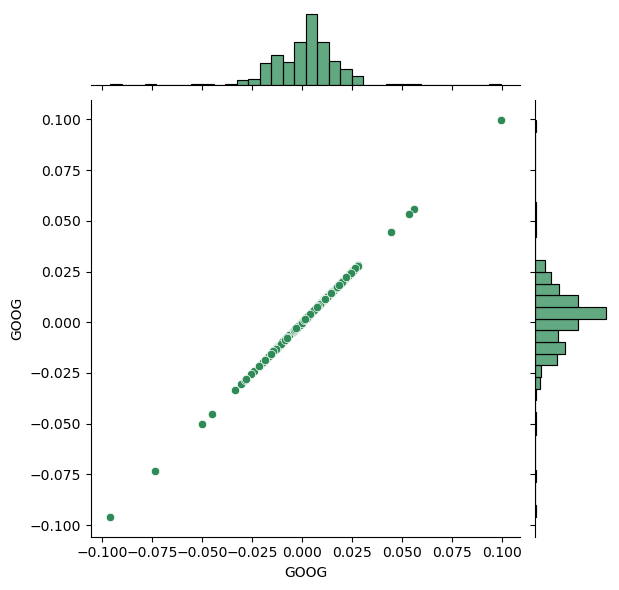

In [43]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


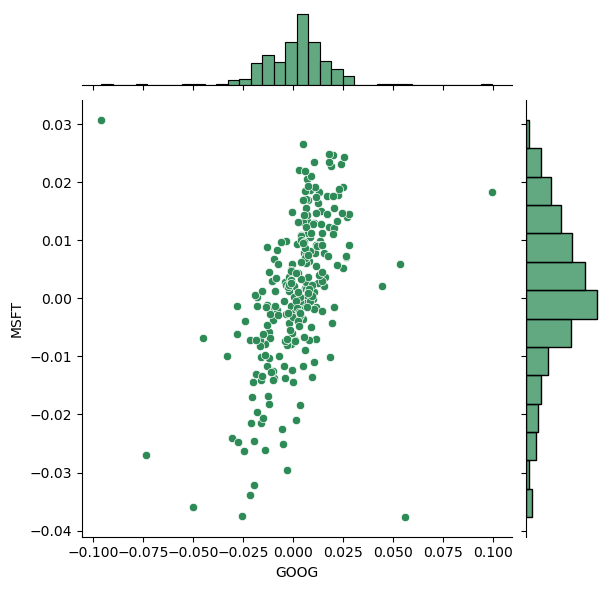

In [44]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='seagreen')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

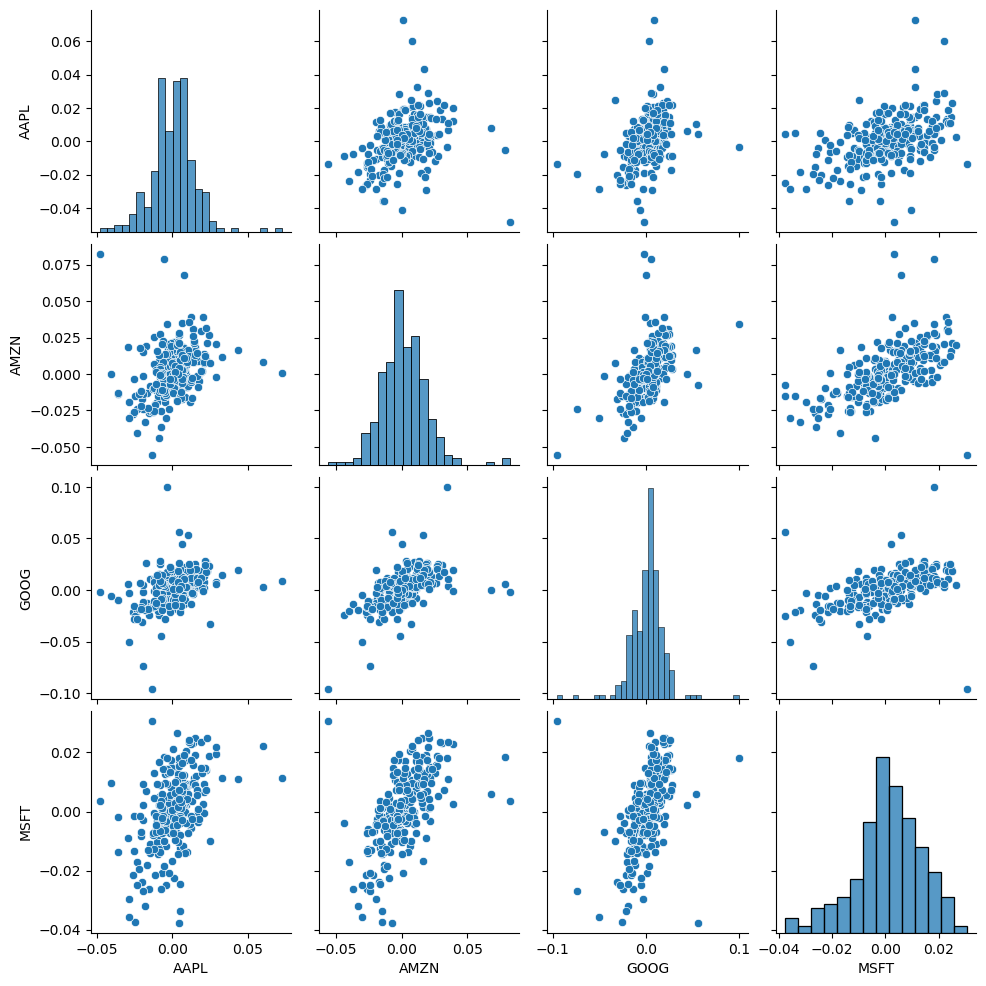

In [46]:
sns.pairplot(tech_rets.dropna())

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

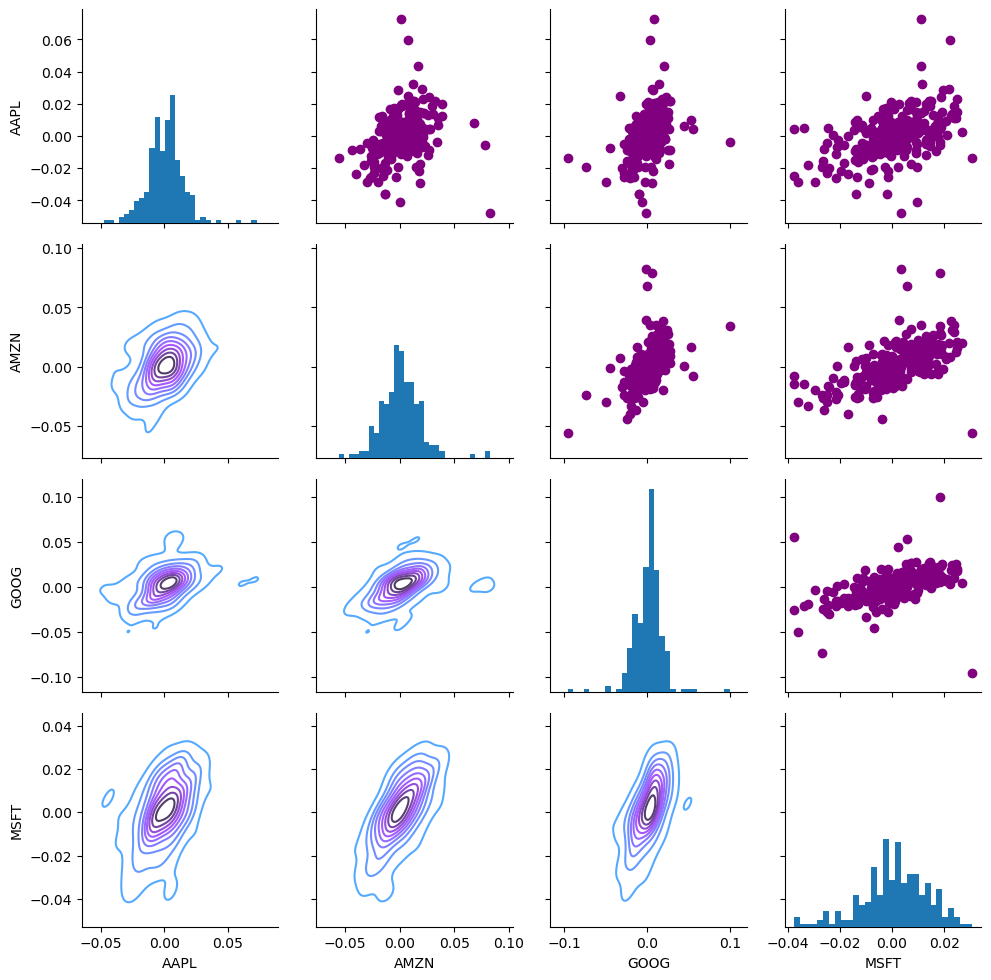

In [47]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color = 'purple')

returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')

returns_fig.map_diag(plt.hist,bins = 30)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

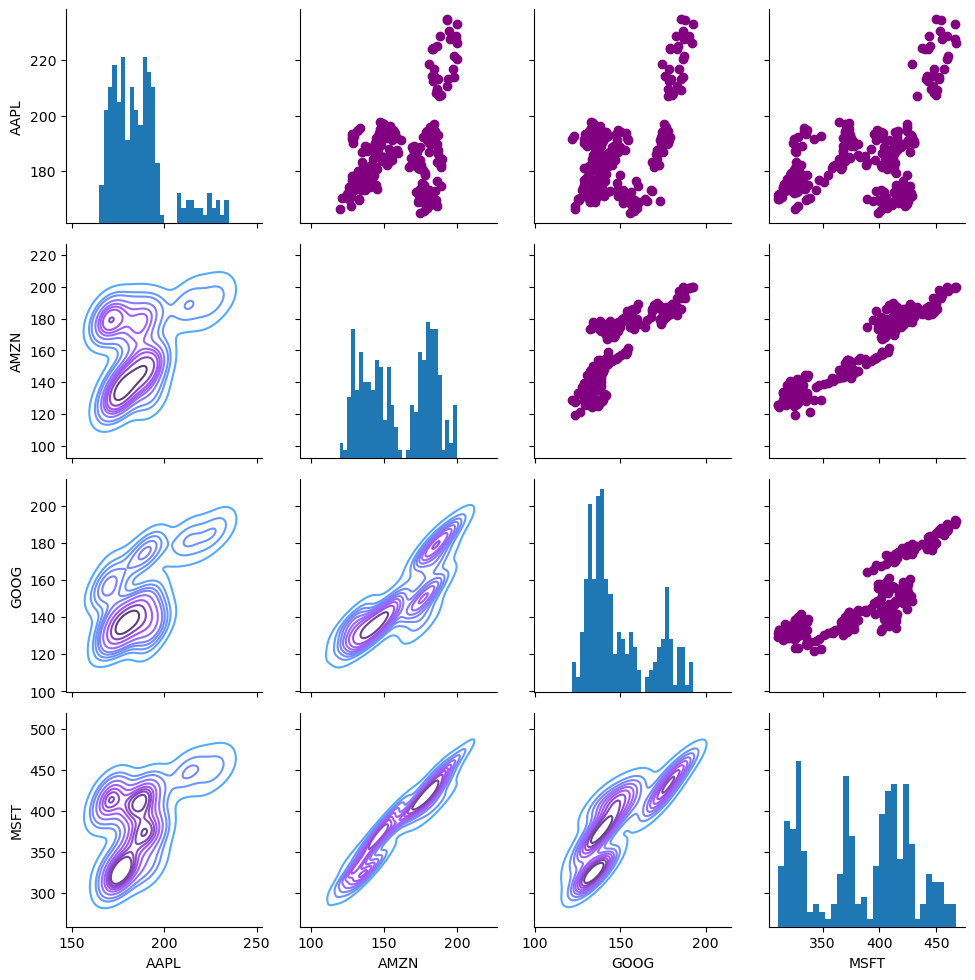

In [48]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color = 'purple')

returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')

returns_fig.map_diag(plt.hist,bins = 30)

<Axes: xlabel='Ticker', ylabel='Ticker'>

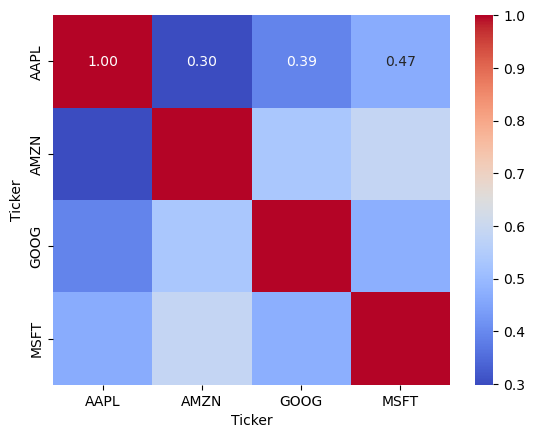

In [50]:
correlation_matrix = tech_rets.dropna().corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [51]:
correlation_matrix

Ticker,AAPL,AMZN,GOOG,MSFT
Ticker,,,,
AAPL,1.000000,0.298661,0.390136,0.467719
AMZN,0.298661,1.000000,0.533943,0.588770
GOOG,0.390136,0.533943,1.000000,0.473058
MSFT,0.467719,0.588770,0.473058,1.000000
